# Omni_Krypto_10

### Project Team Members: Chris Diaz, Jaime Leon, Griselda Ramos, Yutika Misra

Questions to answers:

- What coins will we use?

- How to determine what coin is conservative or aggressive?

- If we invest $10K in either of these porfolios, what could my returns be in 10 years?

We will use 10 coins that existed as of January 2018 and determine the the possible gains on aggressive and convervative portfolios.  


In [106]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [107]:
# import files

binance_data = Path("crypto_dataset/Binance_Coin.csv")
binance = pd.read_csv(binance_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
binance.drop(columns=['SNo', "Vol." ],inplace=True)
binance.rename(columns = {'Price':'close'}, inplace = True)
binance.sort_values('Date', ascending=True).dropna()
binance.columns = pd.MultiIndex.from_product([['Binance'], binance.columns])


bitcoin_data = Path("crypto_dataset/Bitcoin.csv")
bitcoin = pd.read_csv(bitcoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
bitcoin.drop(columns=['SNo', "Vol." ],inplace=True)
bitcoin.rename(columns = {'Price':'close'}, inplace = True)
bitcoin.sort_values('Date', ascending=True).dropna()
bitcoin.columns = pd.MultiIndex.from_product([['Bitcon'], bitcoin.columns])


cardano_data = Path("crypto_dataset/Cardano.csv")
cardano = pd.read_csv(cardano_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cardano.drop(columns=['SNo', "Vol." ],inplace=True)
cardano.rename(columns = {'Price':'close'}, inplace = True)
cardano.sort_values('Date', ascending=True).dropna()
cardano.columns = pd.MultiIndex.from_product([['Cardano'], cardano.columns])

dogecoin_data = Path("crypto_dataset/dogecoin.csv")
dogecoin = pd.read_csv(dogecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
dogecoin.drop(columns=['SNo', "Vol." ],inplace=True)
dogecoin.rename(columns = {'Price':'close'}, inplace = True)
dogecoin.sort_values('Date', ascending=True).dropna()
dogecoin.columns = pd.MultiIndex.from_product([['Dogecoin'], dogecoin.columns])


ethereum_data = Path("crypto_dataset/ethereum.csv")
ethereum = pd.read_csv(ethereum_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
ethereum.drop(columns=['SNo', "Vol." ],inplace=True)
ethereum.rename(columns = {'Price':'close'}, inplace = True)
ethereum.sort_values('Date', ascending=True).dropna()
ethereum.columns = pd.MultiIndex.from_product([['Ethereum'], ethereum.columns])


iota_data = Path("crypto_dataset/iota.csv")
iota = pd.read_csv(iota_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
iota.drop(columns=['SNo', "Vol." ],inplace=True)
iota.rename(columns = {'Price':'close'}, inplace = True)
iota.sort_values('Date', ascending=True).dropna()
iota.columns = pd.MultiIndex.from_product([['Iota'], iota.columns])


litecoin_data = Path("crypto_dataset/litecoin.csv")
litecoin = pd.read_csv(litecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
litecoin.drop(columns=['SNo', "Vol." ],inplace=True)
litecoin.rename(columns = {'Price':'close'}, inplace = True)
litecoin.sort_values('Date', ascending=True).dropna()
litecoin.columns = pd.MultiIndex.from_product([['Litecoin'], litecoin.columns])

monero_data = Path("crypto_dataset/monero.csv")
monero = pd.read_csv(monero_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
monero.drop(columns=['SNo', "Vol." ],inplace=True)
monero.rename(columns = {'Price':'close'}, inplace = True)
monero.sort_values('Date', ascending=True).dropna()
monero.columns = pd.MultiIndex.from_product([['Monero'], monero.columns])

stellar_data = Path("crypto_dataset/stellar.csv")
stellar = pd.read_csv(stellar_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
stellar.drop(columns=['SNo', "Vol." ],inplace=True)
stellar.rename(columns = {'Price':'close'}, inplace = True)
stellar = stellar.sort_values('Date', ascending=True).dropna()
stellar.columns = pd.MultiIndex.from_product([['Stellar'], stellar.columns])



xpr_data = Path("crypto_dataset/XPR.csv")
xpr = pd.read_csv(xpr_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
xpr.drop(columns=['SNo', "Vol." ],inplace=True)
xpr.rename(columns = {'Price':'close'}, inplace = True)
xpr = xpr.sort_values('Date', ascending=True).dropna()
xpr.columns = pd.MultiIndex.from_product([['XPR'], xpr.columns])

xpr

XPR                                    
              close     Open     High      Low Change %
Date                                                   
2018-01-01  2.05000  1.98000  2.09000  1.81000     3.54
2018-01-02  2.19000  2.05000  2.21000  1.89000     6.83
2018-01-03  2.73000  2.19000  2.85000  2.15000    24.66
2018-01-04  2.73000  2.73000  3.29000  2.58000     0.00
2018-01-05  2.51000  2.73000  3.05000  2.24000    -8.06
...             ...      ...      ...      ...      ...
2021-08-20  1.26318  1.23482  1.28762  1.19994     2.29
2021-08-21  1.21663  1.26316  1.28262  1.20444    -3.69
2021-08-22  1.22574  1.21654  1.25540  1.18284     0.75
2021-08-23  1.24617  1.22577  1.30288  1.21150     1.67
2021-08-24  1.24856  1.24630  1.26486  1.21836     0.19

[1332 rows x 5 columns]

In [108]:
#Concat all coin prices into one data frame
#
# combined_df = pd.concat([binance, bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar,xpr],
#              axis="columns", join="inner")
# combined_df.head()

# prices_df= combined_df[['Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price' ]]
# prices_df.head()

joined_data = pd.concat([binance,bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar, xpr],
             axis="columns", join="inner")

joined_data.head()


Binance                               Bitcon                    \
             close  Open   High   Low Change %    close     Open     High   
Date                                                                        
2018-01-01    8.45  8.53   8.70  7.80    -0.94  13444.9  13850.5  13921.5   
2018-01-02    8.72  8.45   9.11  8.09     3.20  14754.1  13444.9  15306.1   
2018-01-03    9.30  8.72   9.47  8.27     6.65  15156.6  14754.1  15435.0   
2018-01-04    9.14  9.30   9.46  8.56    -1.72  15180.1  15156.5  15408.7   
2018-01-05   14.88  9.14  16.82  8.97    62.80  16954.8  15180.1  17126.9   

                              ... Stellar                                   \
                Low Change %  ...   close    Open    High     Low Change %   
Date                          ...                                            
2018-01-01  12877.7    -2.93  ...  0.4848  0.3540  0.5231  0.3521    36.95   
2018-01-02  12934.2     9.74  ...  0.5570  0.4848  0.5898  0.4620    14.89   
2018-01-03  14579.7     2.73  ...  0.8860  0.5570  0.9199  0.5524    59.07   
2018-01-04  14244.7     0.15  ...  0.6948  0.8860  0.9100  0.6250   -21.58   
2018-01-05  14832.4    11.69  ...  0.6351  0.6948  0.7800  0.5353    -8.59   

             XPR                             
           close  Open  High   Low Change %  
Date                                         
2018-01-01  2.05  1.98  2.09  1.81     3.54  
2018-01-02  2.19  2.05  2.21  1.89     6.83  
2018-01-03  2.73  2.19  2.85  2.15    24.66  
2018-01-04  2.73  2.73  3.29  2.58     0.00  
2018-01-05  2.51  2.73  3.05  2.24    -8.06  

[5 rows x 50 columns]

## Data Cleanup & Exploration

CSV files were obtained from Kaggle. Columns were deleted, Index was set and its date format was corrected, Column was renamed, created Multi-Level Column index. 

## Initial Analysis
find corelation among the coins to distribute them into conservative or aggressive porfolio

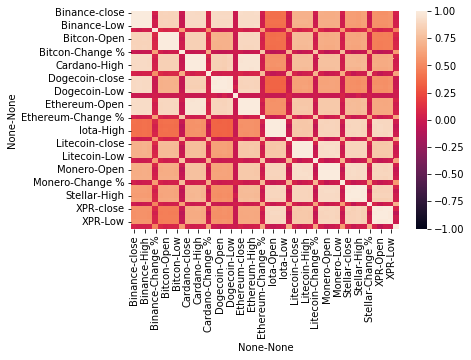

In [110]:
#show correlation among the coins
correlation = joined_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

## Omni-Krypto Blue (Conservative) Analysis:

50% of portfolio is evenly distributed among Bitcoin & Ethereum 
Even distribution among: Binance, Stellar, XPR, Iota, Monero, Dogecoin, Litecoin 

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns on the conservative porfolio
# Weight Distribution: 

conservative_allocation = MCSimulation(
    portfolio_data = joined_data,
    weights = [0.0625, 0.25,.0625,.0625,.0625,.0625,.0625,.0625,.25,.0625],
    num_simulation = 200,
    num_trading_days = 365*10
)

In [69]:
# Run Monte Carlo Simuation

conservative_allocation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\grise\be safe\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
1,1.058679,1.096075,0.893437,1.048713,0.804747,1.164612,0.923633,1.052651,1.264812e+00,0.877088,...,0.937100,1.015510,1.140690,1.177398,0.887076,1.116441,1.054026,0.745925,1.064274e+00,0.949760
2,1.167071,0.999076,0.879892,1.129229,0.846927,1.035015,0.835073,1.039874,1.309867e+00,0.874936,...,1.076079,1.106119,0.968992,1.251789,1.054994,1.140156,0.994670,0.756738,1.092267e+00,0.958534
3,1.305654,0.960767,0.886490,1.229230,0.855793,0.869781,0.866070,0.985635,1.114065e+00,0.778128,...,1.268710,1.036767,0.997548,1.193929,0.982445,1.143699,0.936131,0.699855,9.090669e-01,0.855035
4,1.439718,0.983901,0.890485,1.345850,0.868684,0.764204,0.927873,1.063855,1.271893e+00,0.939252,...,1.242502,0.964699,0.986721,1.141430,0.921557,1.211329,0.775483,0.702474,7.692455e-01,0.768360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,0.007179,0.049103,0.000024,0.000862,0.085118,0.002961,1.934369,15639.885335,1.858714e-07,3635.175677,...,0.000017,218.360156,0.001112,0.000021,0.618652,0.954833,87.361822,0.000525,6.854949e-07,0.000070
3647,0.006806,0.043256,0.000020,0.001014,0.084900,0.002415,2.082770,15801.261459,2.007399e-07,3898.080777,...,0.000016,212.510719,0.001043,0.000022,0.616456,0.979056,91.443879,0.000524,7.179294e-07,0.000078
3648,0.006134,0.038094,0.000020,0.000763,0.086631,0.002685,2.393470,15147.180591,1.794952e-07,3265.318147,...,0.000017,262.133494,0.001071,0.000022,0.617325,1.059854,108.601017,0.000527,8.347383e-07,0.000087
3649,0.005457,0.040704,0.000017,0.000596,0.078247,0.002426,2.574732,17340.132827,1.916147e-07,3430.391009,...,0.000016,223.718942,0.001165,0.000020,0.506281,1.014873,115.972345,0.000526,8.184452e-07,0.000069


In [70]:
# Run stats
conservative_even_tbl = conservative_allocation.summarize_cumulative_return()
conservative_even_tbl

count           2.000000e+02
mean            5.306659e+04
std             5.008619e+05
min             7.817169e-10
25%             1.608928e-03
50%             4.831721e-02
75%             6.597653e+00
max             6.150161e+06
95% CI Lower    7.552154e-07
95% CI Upper    2.214327e+04
Name: 3650, dtype: float64

In [71]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in stocks
even_ci_lower = round(conservative_even_tbl[8]*10000,2)
even_ci_upper = round(conservative_even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $0.01 and $221432651.35.


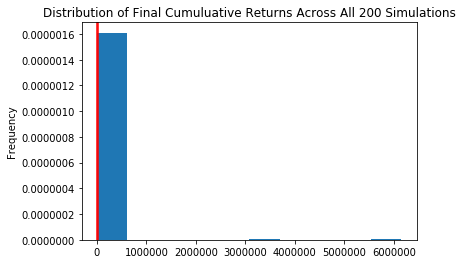

In [72]:
# plot distribution 

conservative_allocation.plot_distribution()
conservative_allocation

## Omni-Krypto Green (Aggressive) Analysis:

60% of portfolio is evenly distributed (15% each) among: Binance, stellar,  XPR, Dogecoin
40& remaining percent to Bitcoin, Iota, Monero, Cardano, Ethereum, Litecoin



In [73]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns on the aggressive porfolio
# Weight Distribution: 

aggressive_allocation = MCSimulation(
    portfolio_data = joined_data,
    weights = [0.15, 0.067,.15,.15,.066,.066,.067,.15,.067,.067],
    num_simulation = 200,
    num_trading_days = 365*10
)


In [74]:
# Run Monte Carlo Simulation
aggressive_allocation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\grise\be safe\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.499979e+00,5.008911e-01,9.731687e-01,1.260848e+00,1.130419e+00,1.117853e+00,1.054262e+00,1.063867e+00,1.143789e+00,1.004907e+00,...,7.737742e-01,8.894970e-01,1.131518e+00,6.364473e-01,9.437633e-01,1.040927e+00,6.533011e-01,8.933050e-01,1.046776e+00,1.040984e+00
2,8.213624e-01,2.842614e-01,1.213287e+00,1.403259e+00,9.270293e-01,1.437581e+00,1.146901e+00,9.362249e-01,1.274060e+00,1.035403e+00,...,8.874132e-01,9.261795e-01,1.193985e+00,5.058844e-01,2.906568e-01,1.134669e+00,5.860151e-01,1.063984e+00,1.332486e+00,9.412747e-01
3,6.887339e-01,3.014775e-01,1.358578e+00,1.402627e+00,8.225448e-01,2.006798e+00,8.631379e-01,1.105736e+00,1.099493e+00,7.251716e-01,...,1.184538e+00,1.048749e+00,1.363293e+00,5.889196e-01,2.515227e-01,1.428851e+00,7.512758e-01,1.475741e+00,1.463359e+00,6.659650e-01
4,9.493629e-01,3.299823e-01,1.348374e+00,1.234572e+00,7.180689e-01,1.791861e+00,7.118528e-01,1.463898e+00,1.113910e+00,6.375959e-01,...,1.575824e+00,8.178775e-01,1.346257e+00,5.947258e-01,2.940920e-01,1.711845e+00,1.191717e+00,1.551012e+00,1.339855e+00,7.380471e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,-4.081148e-56,1.098839e-40,1.383827e-39,8.524915e-43,4.091957e-52,1.414774e-40,7.999325e-42,2.260064e-40,5.981042e-53,2.214828e-39,...,1.061795e-42,-1.076732e-35,3.471785e-42,1.476469e-49,4.322820e-51,3.949249e-45,2.198209e-29,1.792156e-33,2.660278e-40,-5.534207e-35
3647,-3.916467e-56,1.299196e-40,1.047939e-39,3.924592e-43,4.017403e-52,1.548640e-40,8.027216e-42,2.728813e-40,6.330406e-53,2.235925e-39,...,1.352198e-42,-1.234893e-35,3.974586e-42,1.126939e-49,3.624806e-51,4.812800e-45,2.224568e-29,2.398850e-33,4.119770e-40,-6.445707e-35
3648,-2.423580e-56,9.298041e-41,1.175099e-39,4.730822e-43,3.453335e-52,1.285093e-40,8.714915e-42,2.057359e-40,8.727428e-53,2.387869e-39,...,1.883731e-42,-1.335516e-35,6.066971e-42,9.827560e-50,5.433392e-51,4.606958e-45,2.158609e-29,2.802495e-33,4.329582e-40,-5.762266e-35
3649,-3.250307e-56,1.038052e-40,1.198452e-39,5.614667e-43,3.139529e-52,1.451154e-40,1.024860e-41,1.962091e-40,9.216500e-53,2.325700e-39,...,1.854510e-42,-1.392203e-35,8.469278e-42,7.865586e-50,5.933727e-51,5.550206e-45,1.579401e-29,2.585097e-33,5.336940e-40,-4.975545e-35


In [75]:
# Run stats
aggressive_even_tbl = agrresive_allocation.summarize_cumulative_return()
aggressive_even_tbl

count           2.000000e+02
mean            3.143542e-21
std             4.439215e-20
min            -2.971902e-30
25%             1.789755e-51
50%             5.887173e-44
75%             2.415887e-39
max             6.278037e-19
95% CI Lower   -6.948478e-38
95% CI Upper    2.970865e-28
Name: 3650, dtype: float64

In [76]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in stocks
even_ci_lower = round(aggressive_even_tbl[8]*10000,2)
even_ci_upper = round(aggressive_even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $-0.0 and $0.0.


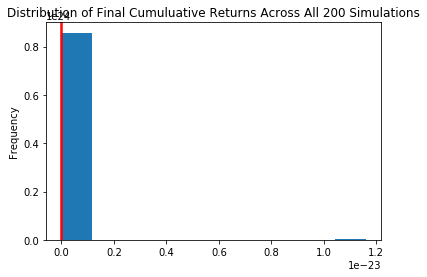

In [111]:
# plot distribution 

aggressive_allocation.plot_distribution()
aggressive_allocation

## Postmortem

- Discuss any difficulties that arose, and how you dealt with them.
- Discuss any additional questions that came up, but which you didn't have time to answer: 
- What would you research next, if you had two more weeks?

## Questions


### FORGET ABOUT THIS

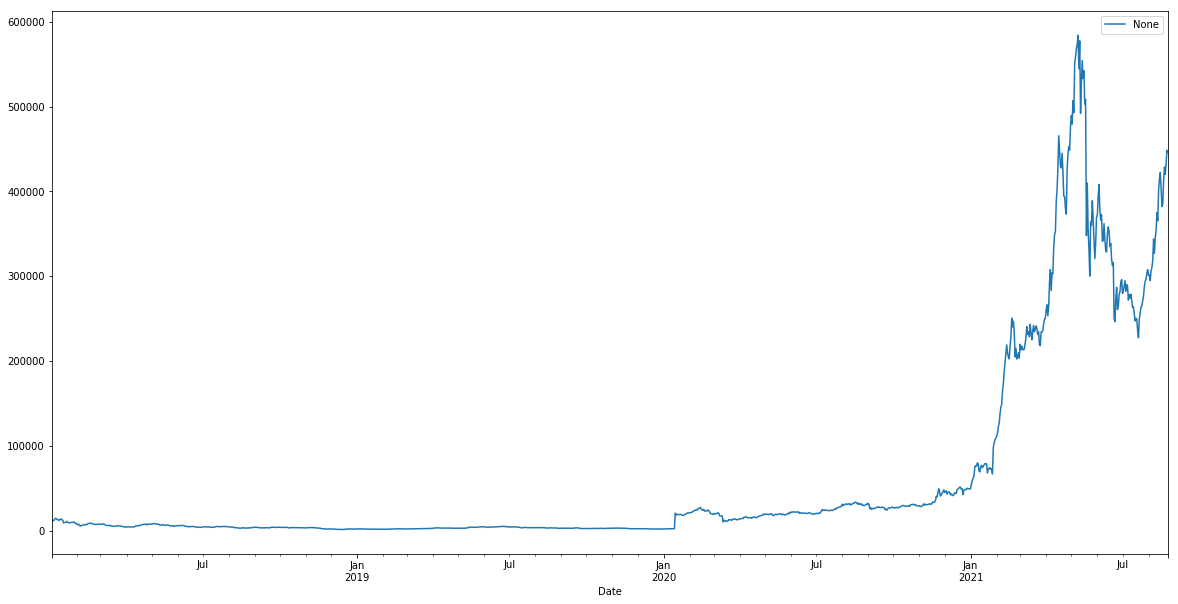

In [107]:
#amount of each stock
# omni crypto test
weights = [0.1, 0.1,.1,.1,.1,.1,.1,.1,.1,.1]
portfolio_returns = pricechange_df.dot(weights)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

## conservative

### Cumulative returns on a 10K investment

### Sharpe Ratio

# omni crypto Aggressive green

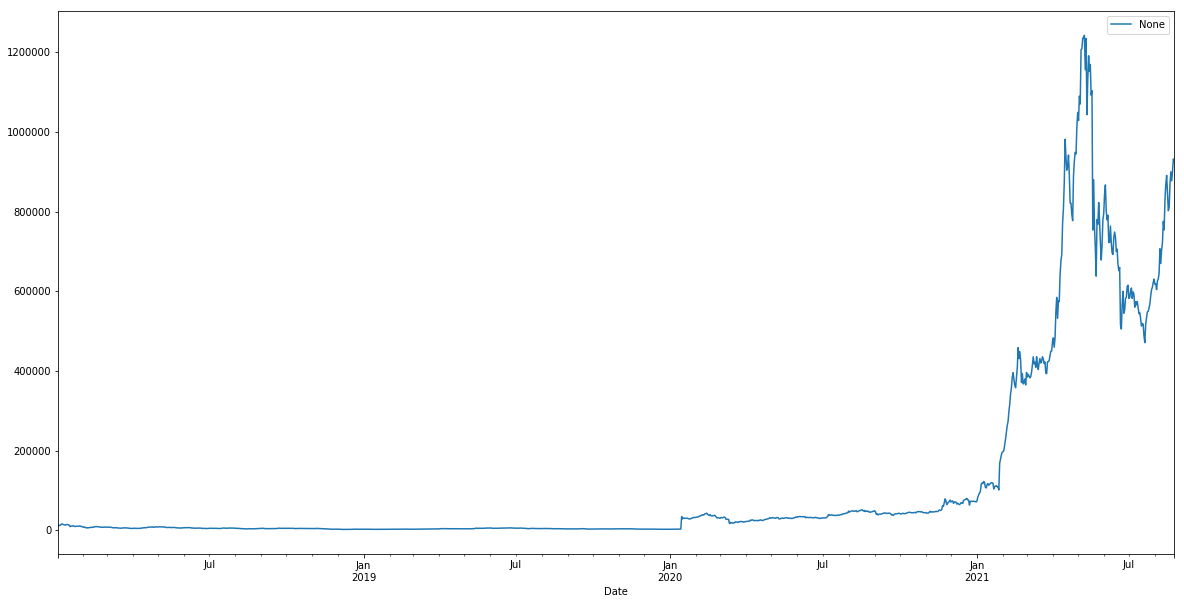

In [134]:
#Cumulative Returns
# omni crypto Aggressive green
'Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price'
weights = [0.15, 0.067,.15,.15,.066,.066,.067,.15,.067,.067]
portfolio_returns_aggresive = pricechange_df.dot(weights)
portfolio_returns_aggresive.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

# Sharpe Ratio

In [3]:
# start a poll at the begining of class. 

# charts that validate porfolio allocation- coorelation, heat map- before portfolios are created
# for each portfolio: sharpe rato, cumulative returns, monte carlo (?) 

# plot all together. and use a new library 

# wrapping up? review pole results. 

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df.calc_cumulative_return()

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Binance Price,1.000000,0.617582,0.496024,0.488447,0.572903,0.587852,0.537172,0.038424,0.612633,0.597919
Bitcoin Price,0.617582,1.000000,0.615823,0.591237,0.710640,0.755615,0.678079,0.022190,0.807039,0.784878
Stellar Price,0.496024,0.615823,1.000000,0.716766,0.678809,0.614206,0.760861,0.038162,0.673453,0.634278
XPR Price,0.488447,0.591237,0.716766,1.000000,0.685428,0.588318,0.637123,0.015325,0.654501,0.645542
Iota Price,0.572903,0.710640,0.678809,0.685428,1.000000,0.708330,0.735537,0.067560,0.758756,0.724791
Monero Price,0.587852,0.755615,0.614206,0.588318,0.708330,1.000000,0.670958,0.066343,0.742073,0.721328
Cardano Price,0.537172,0.678079,0.760861,0.637123,0.735537,0.670958,1.000000,0.031575,0.754739,0.698627
Dogecoin Price,0.038424,0.022190,0.038162,0.015325,0.067560,0.066343,0.031575,1.000000,0.021561,0.019952
Ethereum Price,0.612633,0.807039,0.673453,0.654501,0.758756,0.742073,0.754739,0.021561,1.000000,0.810607
Litecoin Price,0.597919,0.784878,0.634278,0.645542,0.724791,0.721328,0.698627,0.019952,0.810607,1.000000


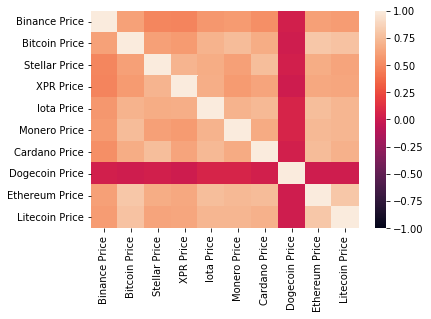

In [42]:
correlation = pricechange_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation